In [ ]:
# Data Loading and Preprocessing

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# Load datasets
benign_df = pd.read_csv('binary_benign.csv')
gas_df = pd.read_csv('binary_spoofing-GAS.csv')
speed_df = pd.read_csv('binary_spoofing-SPEED.csv')
rpm_df = pd.read_csv('binary_spoofing-RPM.csv')
steering_df = pd.read_csv('binary_spoofing-STEERING_WHEEL.csv')
dos_df = pd.read_csv('binary_DoS.csv')

In [18]:
# Add binary labels for classification
benign_df['binary_label'] = 0  # Benign traffic
gas_df['binary_label'] = 1     # Attack traffic
speed_df['binary_label'] = 1   # Attack traffic
rpm_df['binary_label'] = 1     # Attack traffic
steering_df['binary_label'] = 1 # Attack traffic
dos_df['binary_label'] = 1      # Attack traffic

In [21]:
# Combine all datasets
combined_df = pd.concat([benign_df, gas_df, speed_df, rpm_df, steering_df, dos_df], ignore_index=True)

In [23]:
# Let's look at the data structure
print("Dataset shape:", combined_df.shape)
print("\nColumn names:", combined_df.columns.tolist())

Dataset shape: (1408219, 157)

Column names: ['ID0', 'ID1', 'ID2', 'ID3', 'ID4', 'ID5', 'ID6', 'ID7', 'ID8', 'ID9', 'ID10', 'ID11', 'ID12', 'ID13', 'ID14', 'ID15', 'ID16', 'DATA_00', 'DATA_01', 'DATA_02', 'DATA_03', 'DATA_04', 'DATA_05', 'DATA_06', 'DATA_07', 'DATA_08', 'DATA_09', 'DATA_010', 'DATA_011', 'DATA_012', 'DATA_013', 'DATA_014', 'DATA_015', 'DATA_016', 'DATA_10', 'DATA_11', 'DATA_12', 'DATA_13', 'DATA_14', 'DATA_15', 'DATA_16', 'DATA_17', 'DATA_18', 'DATA_19', 'DATA_110', 'DATA_111', 'DATA_112', 'DATA_113', 'DATA_114', 'DATA_115', 'DATA_116', 'DATA_20', 'DATA_21', 'DATA_22', 'DATA_23', 'DATA_24', 'DATA_25', 'DATA_26', 'DATA_27', 'DATA_28', 'DATA_29', 'DATA_210', 'DATA_211', 'DATA_212', 'DATA_213', 'DATA_214', 'DATA_215', 'DATA_216', 'DATA_30', 'DATA_31', 'DATA_32', 'DATA_33', 'DATA_34', 'DATA_35', 'DATA_36', 'DATA_37', 'DATA_38', 'DATA_39', 'DATA_310', 'DATA_311', 'DATA_312', 'DATA_313', 'DATA_314', 'DATA_315', 'DATA_316', 'DATA_40', 'DATA_41', 'DATA_42', 'DATA_43', 'DATA_44

In [25]:
# Extract features and target
# Assuming DATA_X columns are our features - check the actual column names first
feature_cols = [col for col in combined_df.columns if col.startswith('DATA_')]
X = combined_df[feature_cols]
y = combined_df['binary_label']

In [27]:
# Check class distribution
print("\nClass distribution:")
print(y.value_counts())


Class distribution:
binary_label
0    1223737
1     184482
Name: count, dtype: int64


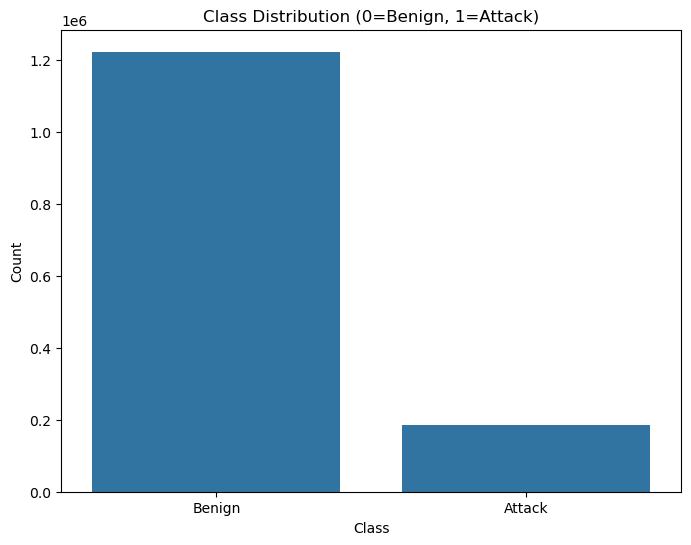

In [29]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution (0=Benign, 1=Attack)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Attack'])
plt.show()

In [31]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [33]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 985753 samples
Testing set: 422466 samples


In [35]:
#Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [39]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

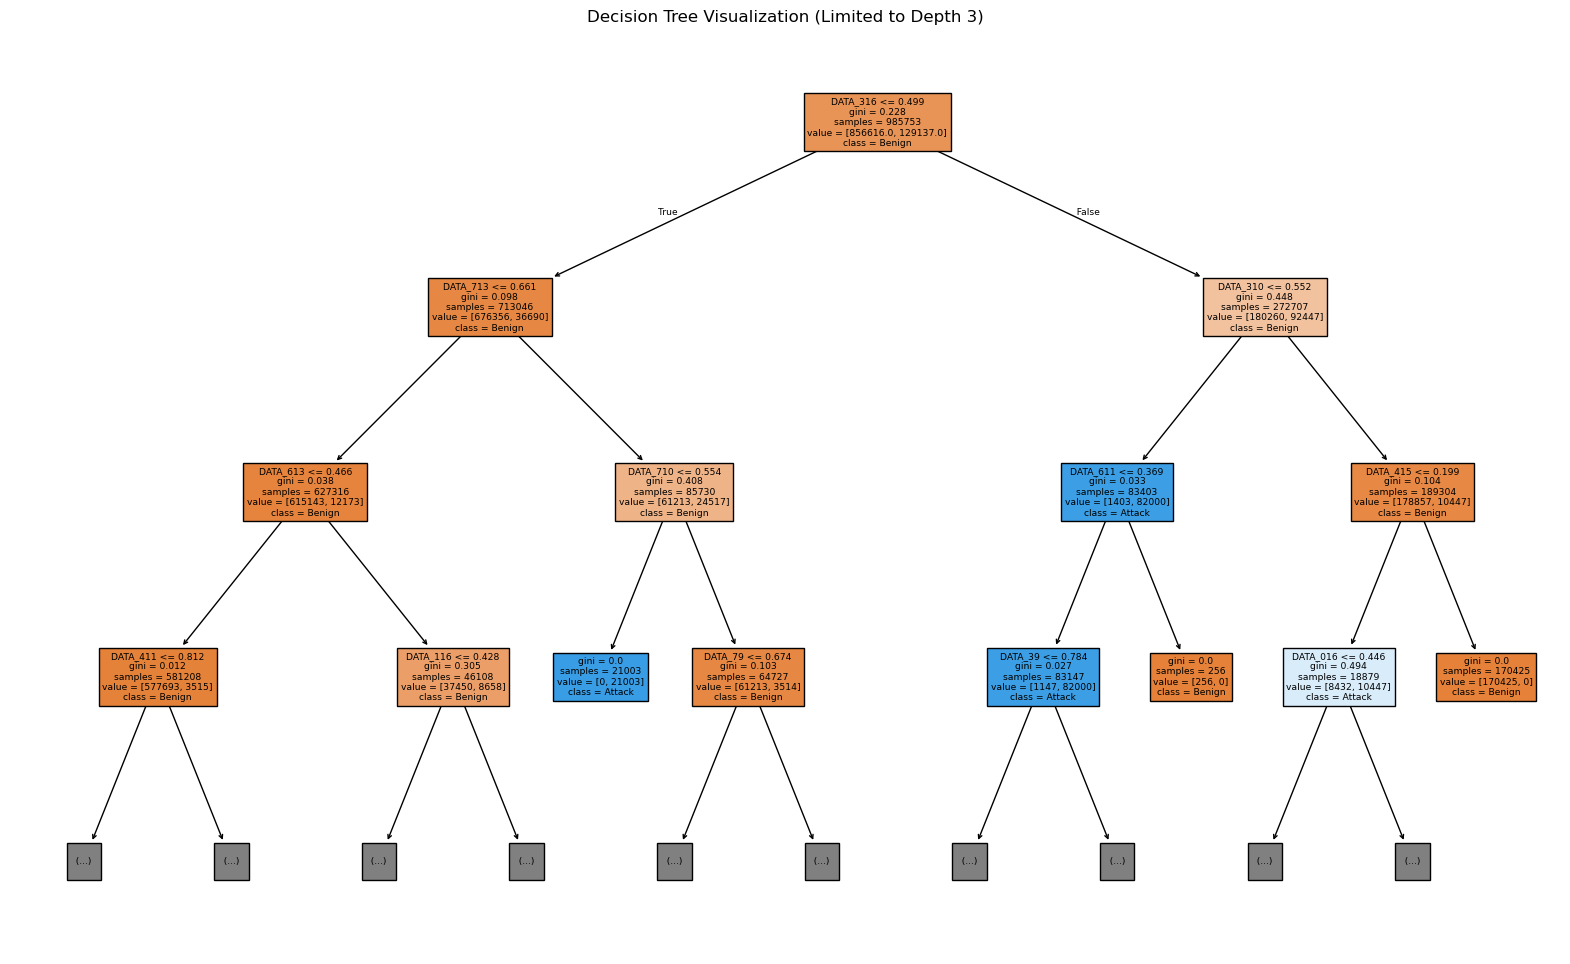

In [41]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 12))
plot_tree(dt_model, filled=True, feature_names=feature_cols, class_names=['Benign', 'Attack'], max_depth=3)
plt.title('Decision Tree Visualization (Limited to Depth 3)')
plt.show()

In [43]:
# Make predictions
dt_train_preds = dt_model.predict(X_train_scaled)
dt_test_preds = dt_model.predict(X_test_scaled)

In [45]:
# Calculate metrics
dt_train_accuracy = accuracy_score(y_train, dt_train_preds)
dt_test_accuracy = accuracy_score(y_test, dt_test_preds)
dt_precision = precision_score(y_test, dt_test_preds)
dt_recall = recall_score(y_test, dt_test_preds)
dt_f1 = f1_score(y_test, dt_test_preds)
print("Decision Tree Performance:")
print(f"Training Accuracy: {dt_train_accuracy:.4f}")
print(f"Testing Accuracy: {dt_test_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}")

Decision Tree Performance:
Training Accuracy: 0.9977
Testing Accuracy: 0.9976
Precision: 0.9818
Recall: 0.9999
F1 Score: 0.9908


In [47]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, dt_test_preds))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    367121
           1       0.98      1.00      0.99     55345

    accuracy                           1.00    422466
   macro avg       0.99      1.00      0.99    422466
weighted avg       1.00      1.00      1.00    422466



In [49]:
# Feature importance
plt.figure(figsize=(12, 6))
feature_importance = dt_model.feature_importances_
# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [feature_cols[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]

<Figure size 1200x600 with 0 Axes>

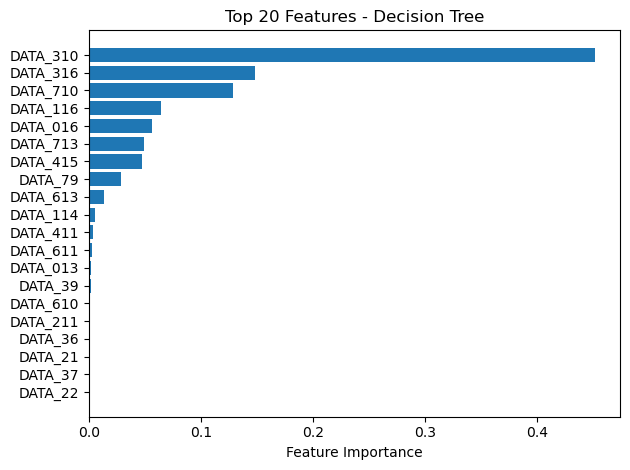

In [51]:
# Plot top 20 features
plt.barh(range(20), sorted_importance[:20])
plt.yticks(range(20), sorted_features[:20])
plt.xlabel('Feature Importance')
plt.title('Top 20 Features - Decision Tree')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

In [53]:
# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Make predictions
rf_train_preds = rf_model.predict(X_train_scaled)
rf_test_preds = rf_model.predict(X_test_scaled)


In [62]:
# Calculate metrics
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
rf_precision = precision_score(y_test, rf_test_preds)
rf_recall = recall_score(y_test, rf_test_preds)
rf_f1 = f1_score(y_test, rf_test_preds)

print("Random Forest Performance:")
print(f"Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Testing Accuracy: {rf_test_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")

Random Forest Performance:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9999
F1 Score: 1.0000


In [64]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_test_preds))

# Feature importance for Random Forest
plt.figure(figsize=(12, 6))
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [feature_cols[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    367121
           1       1.00      1.00      1.00     55345

    accuracy                           1.00    422466
   macro avg       1.00      1.00      1.00    422466
weighted avg       1.00      1.00      1.00    422466



<Figure size 1200x600 with 0 Axes>

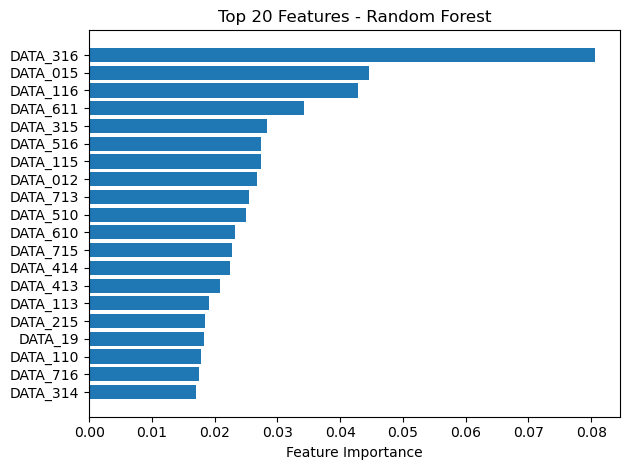

In [66]:
# Plot top 20 features
plt.barh(range(20), sorted_importance[:20])
plt.yticks(range(20), sorted_features[:20])
plt.xlabel('Feature Importance')
plt.title('Top 20 Features - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

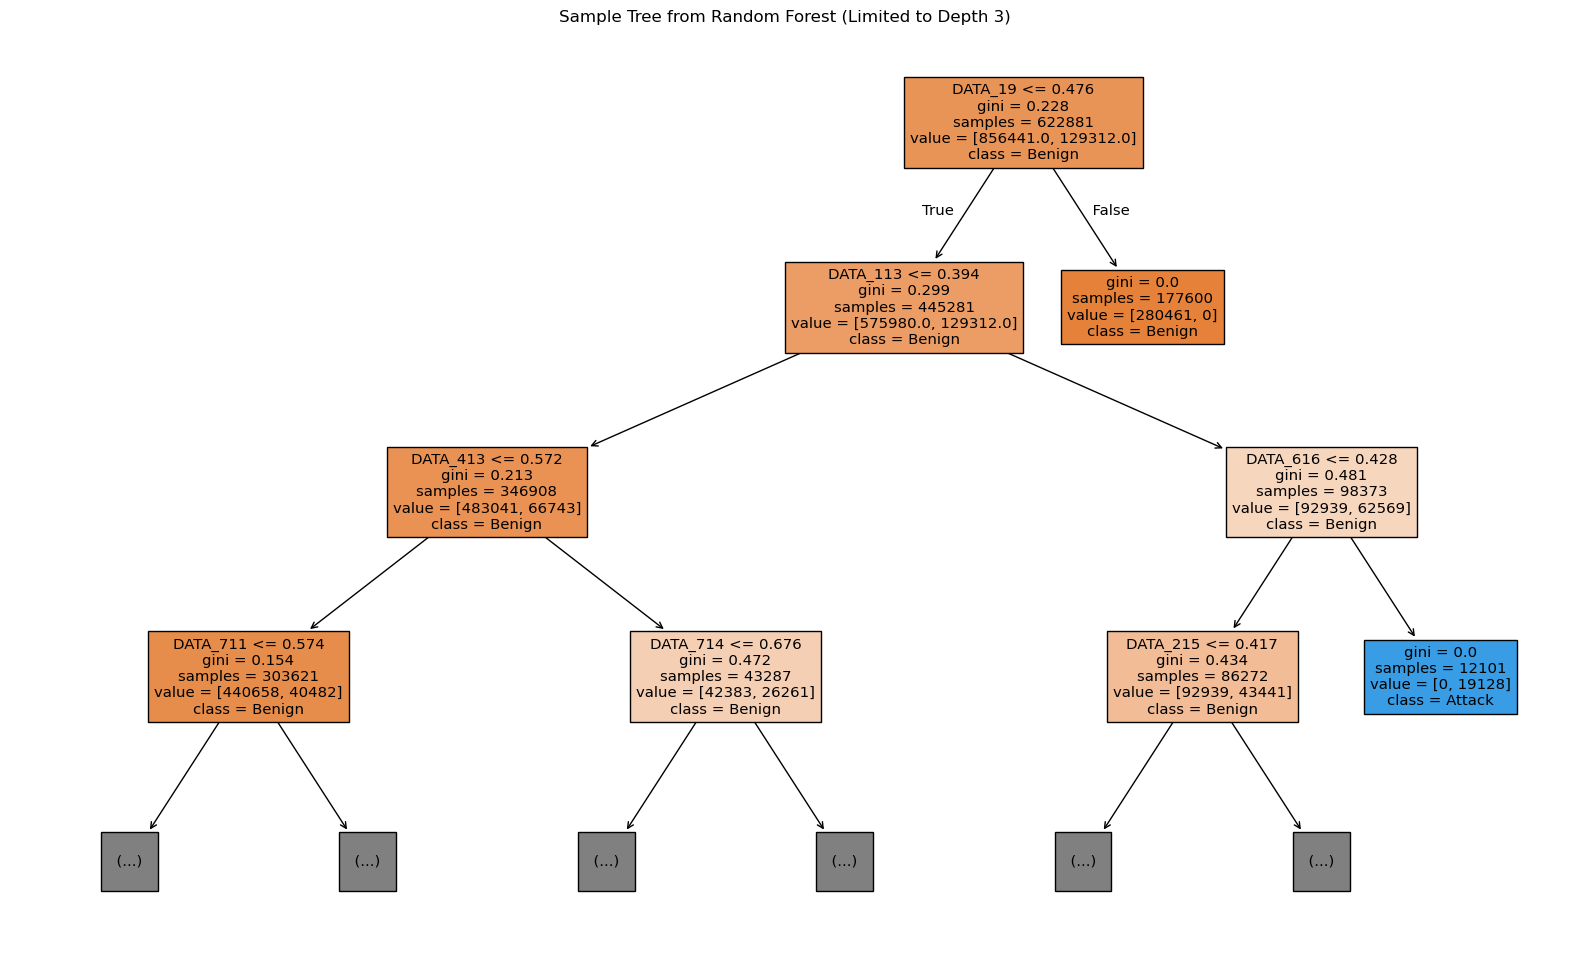

In [68]:
# Visualize one tree from the Random Forest
plt.figure(figsize=(20, 12))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=feature_cols, 
          class_names=['Benign', 'Attack'], max_depth=3)
plt.title('Sample Tree from Random Forest (Limited to Depth 3)')
plt.show()

In [70]:
# XGBoost Classifier


In [72]:
import xgboost as xgb

In [74]:
# Train XGBoost model - with binary labels, no need for label encoding
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [76]:
# Make predictions
xgb_train_preds = xgb_model.predict(X_train_scaled)
xgb_test_preds = xgb_model.predict(X_test_scaled)

In [78]:
# Calculate metrics
xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_preds)
xgb_precision = precision_score(y_test, xgb_test_preds)
xgb_recall = recall_score(y_test, xgb_test_preds)
xgb_f1 = f1_score(y_test, xgb_test_preds)

print("XGBoost Performance:")
print(f"Training Accuracy: {xgb_train_accuracy:.4f}")
print(f"Testing Accuracy: {xgb_test_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1 Score: {xgb_f1:.4f}")

XGBoost Performance:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9999
F1 Score: 1.0000


In [80]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, xgb_test_preds))

# Feature importance for XGBoost
plt.figure(figsize=(12, 6))
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [feature_cols[i] for i in sorted_idx]
sorted_importance = feature_importance[sorted_idx]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    367121
           1       1.00      1.00      1.00     55345

    accuracy                           1.00    422466
   macro avg       1.00      1.00      1.00    422466
weighted avg       1.00      1.00      1.00    422466



<Figure size 1200x600 with 0 Axes>

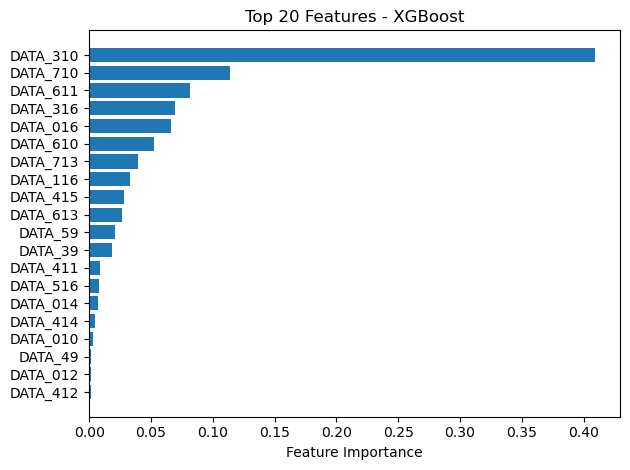

In [82]:
# Plot top 20 features
plt.barh(range(20), sorted_importance[:20])
plt.yticks(range(20), sorted_features[:20])
plt.xlabel('Feature Importance')
plt.title('Top 20 Features - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [84]:
# Learning curves for XGBoost
eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]
xgb_model_eval = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    eval_metric=['error', 'logloss']
)
xgb_model_eval.fit(X_train_scaled, y_train, 
               eval_set=eval_set, 
               verbose=False)

results = xgb_model_eval.evals_result()

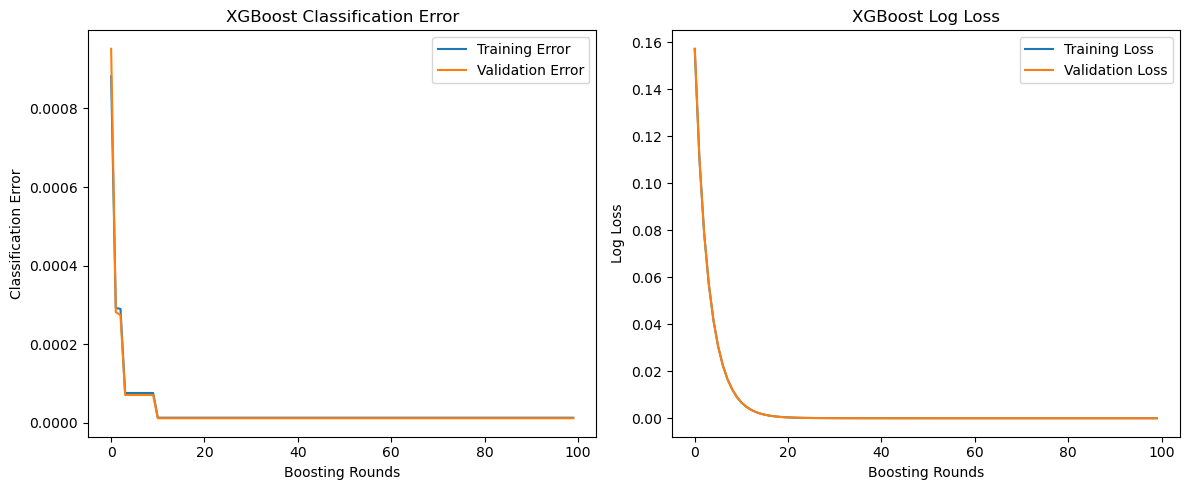

In [86]:
# Plot learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(results['validation_0']['error'], label='Training Error')
plt.plot(results['validation_1']['error'], label='Validation Error')
plt.xlabel('Boosting Rounds')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results['validation_0']['logloss'], label='Training Loss')
plt.plot(results['validation_1']['logloss'], label='Validation Loss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [88]:
# Create Ensemble of Three Models

In [90]:
from sklearn.ensemble import VotingClassifier

In [92]:
# Create voting ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier(random_state=42, max_depth=5)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', xgb.XGBClassifier(objective='binary:logistic', random_state=42, eval_metric='logloss'))
    ],
    voting='hard'  # Using majority voting
)

In [94]:
# Train ensemble model
ensemble_model.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='loglos...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))])

In [96]:
# Make predictions
ensemble_train_preds = ensemble_model.predict(X_train_scaled)
ensemble_test_preds = ensemble_model.predict(X_test_scaled)

In [100]:
# Calculate metrics
ensemble_train_accuracy = accuracy_score(y_train, ensemble_train_preds)
ensemble_test_accuracy = accuracy_score(y_test, ensemble_test_preds)
ensemble_precision = precision_score(y_test, ensemble_test_preds)
ensemble_recall = recall_score(y_test, ensemble_test_preds)
ensemble_f1 = f1_score(y_test, ensemble_test_preds)

print("Ensemble Performance:")
print(f"Training Accuracy: {ensemble_train_accuracy:.4f}")
print(f"Testing Accuracy: {ensemble_test_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1 Score: {ensemble_f1:.4f}")

Ensemble Performance:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9999
F1 Score: 1.0000


In [102]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, ensemble_test_preds))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    367121
           1       1.00      1.00      1.00     55345

    accuracy                           1.00    422466
   macro avg       1.00      1.00      1.00    422466
weighted avg       1.00      1.00      1.00    422466



In [104]:
# Compare all models
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'Ensemble']
train_accuracies = [dt_train_accuracy, rf_train_accuracy, xgb_train_accuracy, ensemble_train_accuracy]
test_accuracies = [dt_test_accuracy, rf_test_accuracy, xgb_test_accuracy, ensemble_test_accuracy]
precisions = [dt_precision, rf_precision, xgb_precision, ensemble_precision]
recalls = [dt_recall, rf_recall, xgb_recall, ensemble_recall]
f1_scores = [dt_f1, rf_f1, xgb_f1, ensemble_f1]

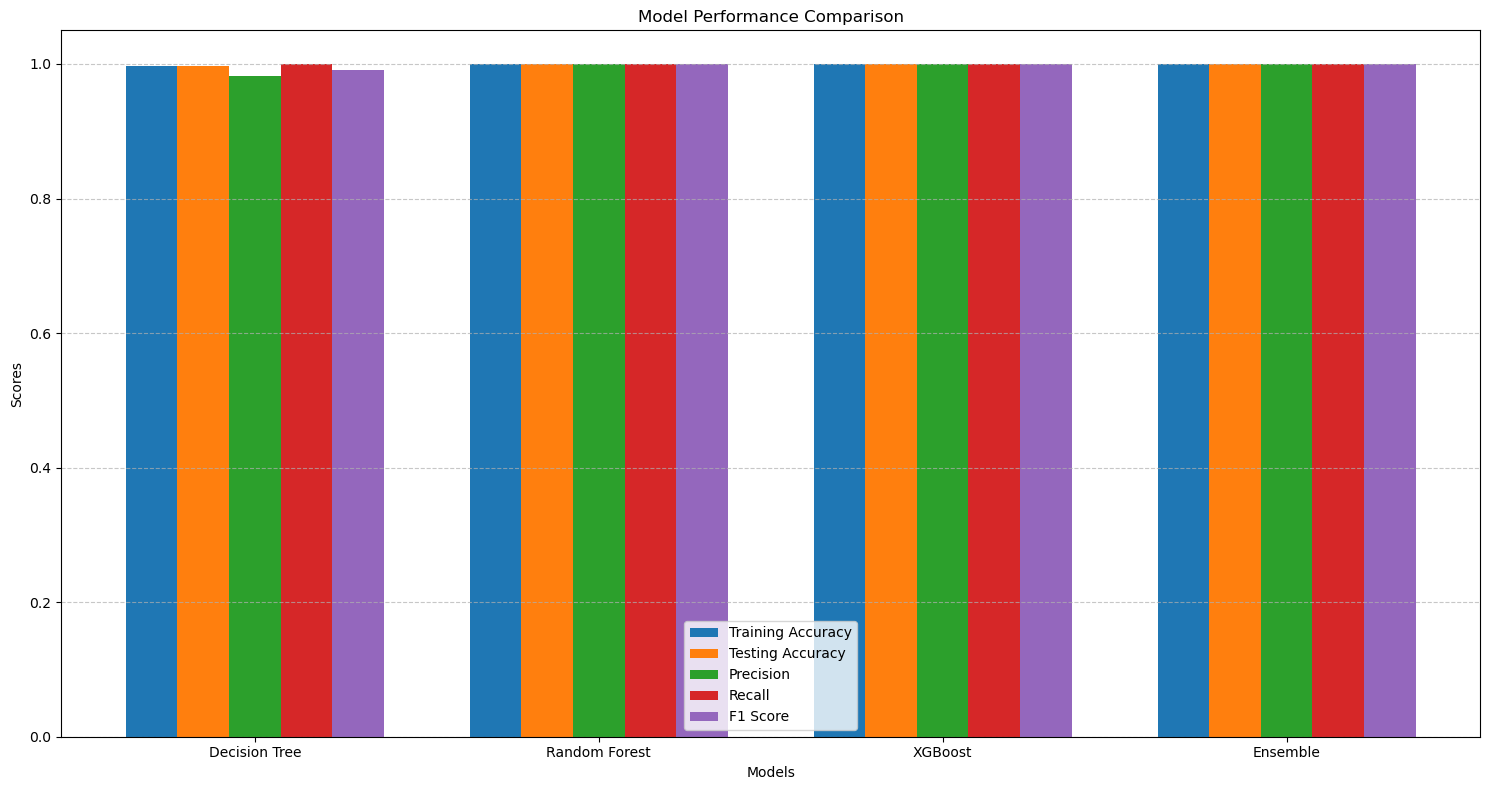

In [106]:
# Create a comparison plot
plt.figure(figsize=(15, 8))
bar_width = 0.15
index = np.arange(len(models))

plt.bar(index, train_accuracies, bar_width, label='Training Accuracy')
plt.bar(index + bar_width, test_accuracies, bar_width, label='Testing Accuracy')
plt.bar(index + 2*bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 3*bar_width, recalls, bar_width, label='Recall')
plt.bar(index + 4*bar_width, f1_scores, bar_width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + 2*bar_width, models)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [108]:
# Step 6: Hyperparameter Optimization for XGBoost


In [110]:
from sklearn.model_selection import GridSearchCV

In [112]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [114]:
# Create XGBoost classifier
xgb_model_base = xgb.XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    eval_metric='logloss'
)

In [116]:
# Create and fit GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model_base,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [118]:
# Get best parameters
best_params = grid_search.best_params_
print("\nBest XGBoost Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Best XGBoost Parameters:
colsample_bytree: 0.8
learning_rate: 0.01
max_depth: 7
n_estimators: 100
subsample: 0.8


In [120]:
# Train optimized XGBoost model
xgb_optimized = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **best_params)
xgb_optimized.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [122]:
# Make predictions
xgb_opt_train_preds = xgb_optimized.predict(X_train_scaled)
xgb_opt_test_preds = xgb_optimized.predict(X_test_scaled)

In [124]:
# Calculate metrics
xgb_opt_train_accuracy = accuracy_score(y_train, xgb_opt_train_preds)
xgb_opt_test_accuracy = accuracy_score(y_test, xgb_opt_test_preds)
xgb_opt_precision = precision_score(y_test, xgb_opt_test_preds)
xgb_opt_recall = recall_score(y_test, xgb_opt_test_preds)
xgb_opt_f1 = f1_score(y_test, xgb_opt_test_preds)

print("\nOptimized XGBoost Performance:")
print(f"Training Accuracy: {xgb_opt_train_accuracy:.4f}")
print(f"Testing Accuracy: {xgb_opt_test_accuracy:.4f}")
print(f"Precision: {xgb_opt_precision:.4f}")
print(f"Recall: {xgb_opt_recall:.4f}")
print(f"F1 Score: {xgb_opt_f1:.4f}")


Optimized XGBoost Performance:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9999
F1 Score: 1.0000


In [126]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, xgb_opt_test_preds))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    367121
           1       1.00      1.00      1.00     55345

    accuracy                           1.00    422466
   macro avg       1.00      1.00      1.00    422466
weighted avg       1.00      1.00      1.00    422466



In [128]:
# Compare base vs optimized XGBoost
models_xgb = ['XGBoost Base', 'XGBoost Optimized']
train_accuracies_xgb = [xgb_train_accuracy, xgb_opt_train_accuracy]
test_accuracies_xgb = [xgb_test_accuracy, xgb_opt_test_accuracy]
precisions_xgb = [xgb_precision, xgb_opt_precision]
recalls_xgb = [xgb_recall, xgb_opt_recall]
f1_scores_xgb = [xgb_f1, xgb_opt_f1]

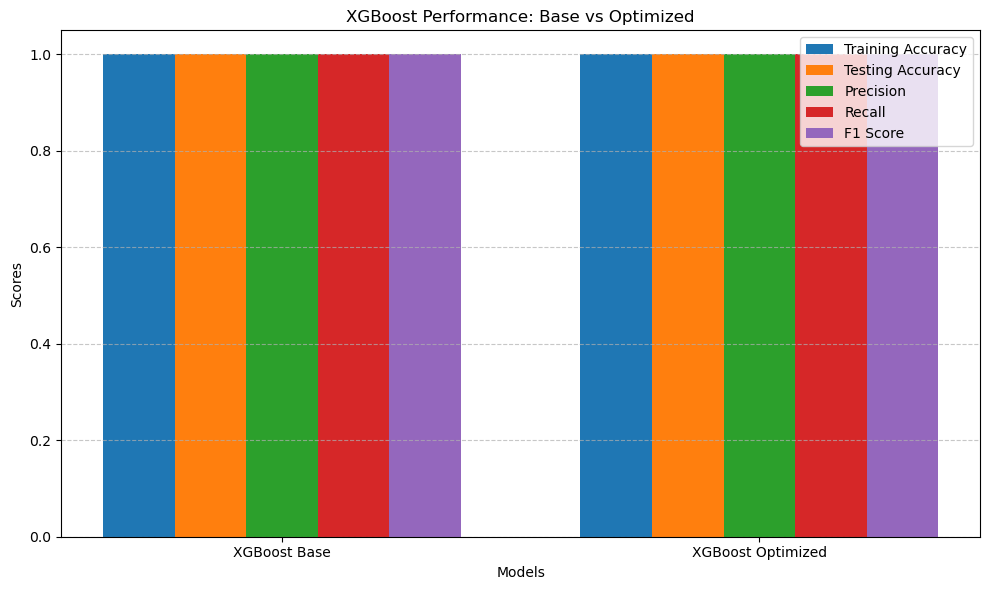

In [130]:
# Create a comparison plot
plt.figure(figsize=(10, 6))
bar_width = 0.15
index = np.arange(len(models_xgb))

plt.bar(index, train_accuracies_xgb, bar_width, label='Training Accuracy')
plt.bar(index + bar_width, test_accuracies_xgb, bar_width, label='Testing Accuracy')
plt.bar(index + 2*bar_width, precisions_xgb, bar_width, label='Precision')
plt.bar(index + 3*bar_width, recalls_xgb, bar_width, label='Recall')
plt.bar(index + 4*bar_width, f1_scores_xgb, bar_width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('XGBoost Performance: Base vs Optimized')
plt.xticks(index + 2*bar_width, models_xgb)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [132]:
# Handling Data Imbalance and Final Validation

In [134]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Original class distribution:
binary_label
0    856616
1    129137
Name: count, dtype: int64


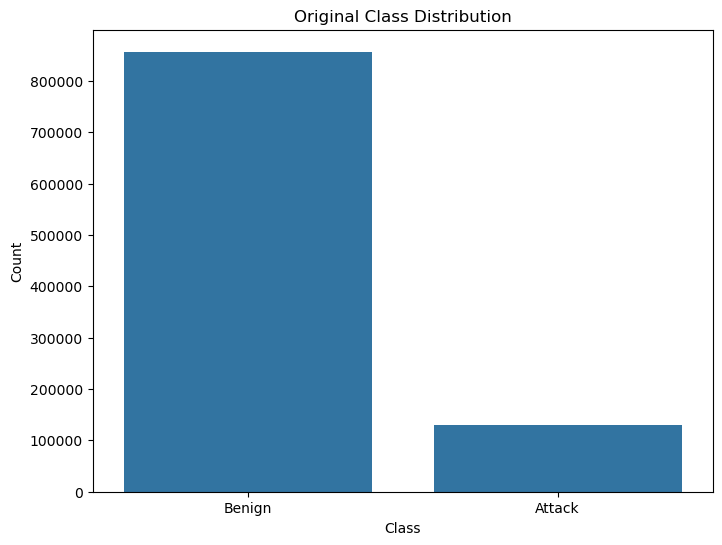

In [136]:
# Check class distribution
print("Original class distribution:")
print(y_train.value_counts())

# Visualize original class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Attack'])
plt.show()

In [140]:
#Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Check balanced class distribution
print("Balanced class distribution:")
print(pd.Series(y_train_balanced).value_counts())

Balanced class distribution:
binary_label
0    856616
1    856616
Name: count, dtype: int64


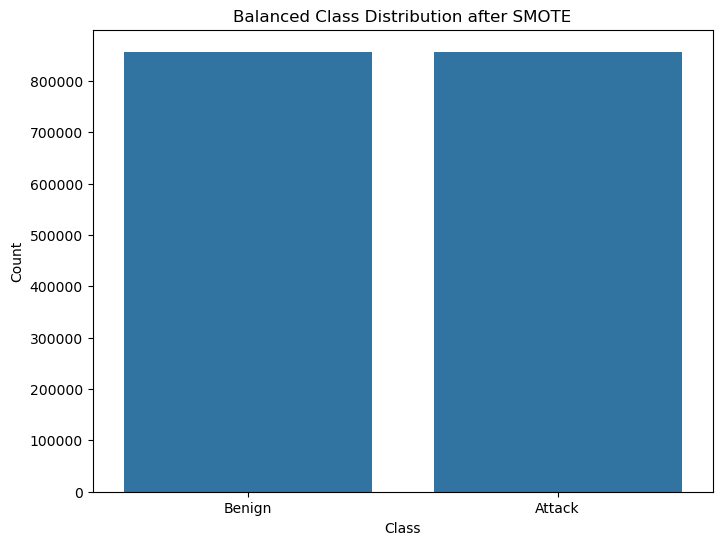

In [142]:
# Visualize balanced class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_balanced)
plt.title('Balanced Class Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Attack'])
plt.show()

In [144]:
# Train models on balanced data
dt_balanced = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_balanced.fit(X_train_balanced, y_train_balanced)

rf_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)

xgb_balanced = xgb.XGBClassifier(objective='binary:logistic', random_state=42, **best_params)
xgb_balanced.fit(X_train_balanced, y_train_balanced)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [146]:
# Create final ensemble with balanced training
final_ensemble = VotingClassifier(
    estimators=[
        ('dt', dt_balanced),
        ('rf', rf_balanced),
        ('xgb', xgb_balanced)
    ],
    voting='soft'  # Using probability-based voting
)
final_ensemble.fit(X_train_balanced, y_train_balanced)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            fea...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [148]:
# Make predictions
final_train_preds = final_ensemble.predict(X_train_balanced)
final_test_preds = final_ensemble.predict(X_test_scaled)

In [150]:
# Calculate metrics
final_train_accuracy = accuracy_score(y_train_balanced, final_train_preds)
final_test_accuracy = accuracy_score(y_test, final_test_preds)
final_precision = precision_score(y_test, final_test_preds)
final_recall = recall_score(y_test, final_test_preds)
final_f1 = f1_score(y_test, final_test_preds)

print("\nFinal Balanced Ensemble Performance:")
print(f"Training Accuracy: {final_train_accuracy:.4f}")
print(f"Testing Accuracy: {final_test_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1 Score: {final_f1:.4f}")


Final Balanced Ensemble Performance:
Training Accuracy: 0.9999
Testing Accuracy: 0.9999
Precision: 0.9995
Recall: 0.9999
F1 Score: 0.9997


In [152]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, final_test_preds))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    367121
           1       1.00      1.00      1.00     55345

    accuracy                           1.00    422466
   macro avg       1.00      1.00      1.00    422466
weighted avg       1.00      1.00      1.00    422466



In [154]:
# Compare all models including balanced ones
models_all = ['DT', 'RF', 'XGB', 'Ensemble', 'XGB Opt', 'Final Balanced']
test_accuracies_all = [dt_test_accuracy, rf_test_accuracy, xgb_test_accuracy, 
                        ensemble_test_accuracy, xgb_opt_test_accuracy, final_test_accuracy]
precisions_all = [dt_precision, rf_precision, xgb_precision, 
                  ensemble_precision, xgb_opt_precision, final_precision]
recalls_all = [dt_recall, rf_recall, xgb_recall, 
               ensemble_recall, xgb_opt_recall, final_recall]
f1_scores_all = [dt_f1, rf_f1, xgb_f1, 
                 ensemble_f1, xgb_opt_f1, final_f1]

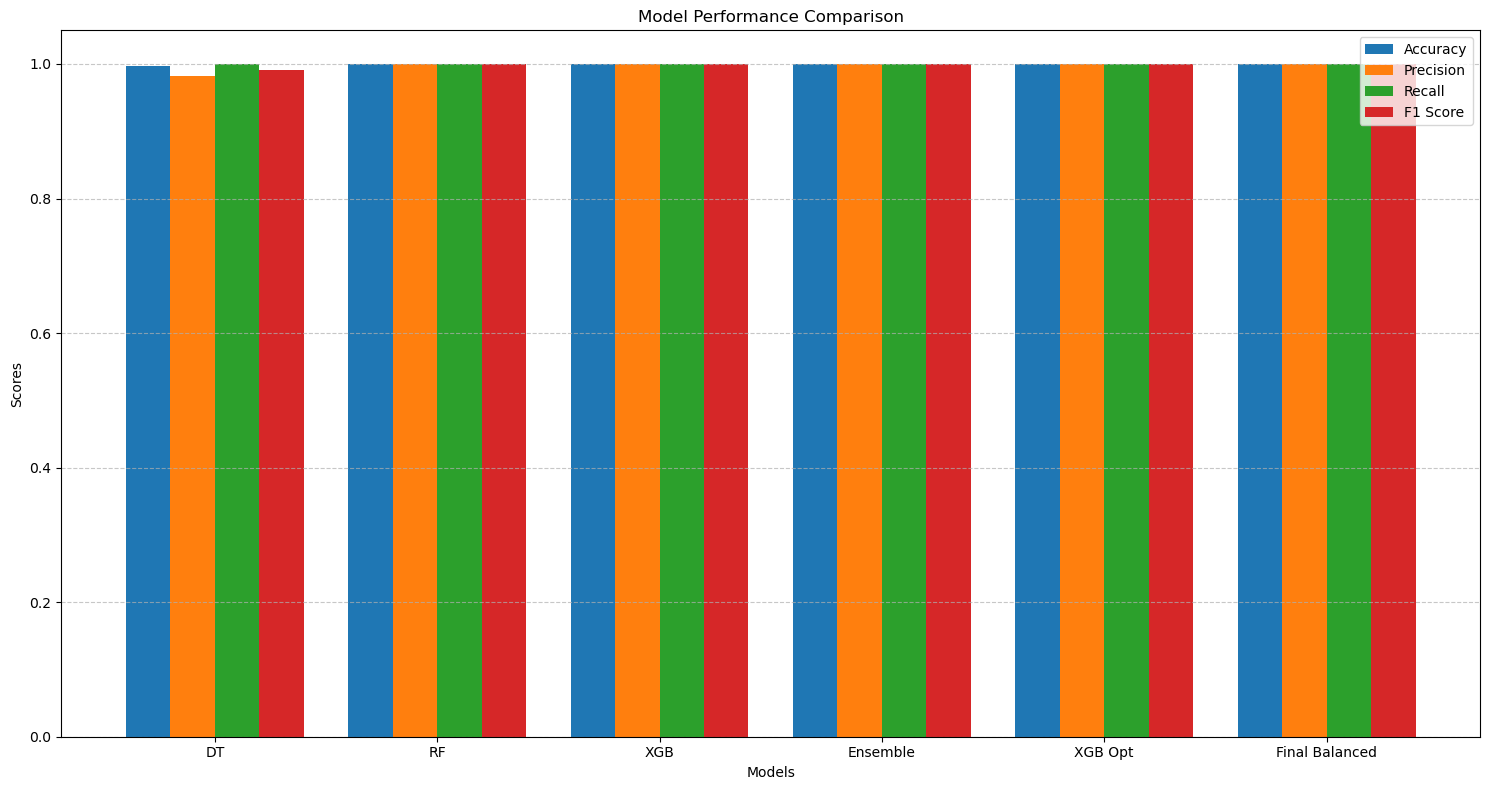

In [156]:
# Create a comparison plot for all models
plt.figure(figsize=(15, 8))
bar_width = 0.2
index = np.arange(len(models_all))

plt.bar(index, test_accuracies_all, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions_all, bar_width, label='Precision')
plt.bar(index + 2*bar_width, recalls_all, bar_width, label='Recall')
plt.bar(index + 3*bar_width, f1_scores_all, bar_width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(index + 1.5*bar_width, models_all)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [158]:
# Save the final model
import joblib
joblib.dump(final_ensemble, 'final_balanced_ensemble.pkl')
print("Final balanced ensemble model saved as 'final_balanced_ensemble.pkl'")

# Print overall performance results as a percentage
print("\nFinal Classification Results:")
print(f"Accuracy: {final_test_accuracy*100:.2f}%")
print(f"Precision: {final_precision*100:.2f}%")
print(f"Recall: {final_recall*100:.2f}%")
print(f"F1 Score: {final_f1*100:.2f}%")

Final balanced ensemble model saved as 'final_balanced_ensemble.pkl'

Final Classification Results:
Accuracy: 99.99%
Precision: 99.95%
Recall: 99.99%
F1 Score: 99.97%
